# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [274]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier



# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [284]:
# Specify the column names
colnames = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [285]:
# Read the data from data file and add the column names
pima_df = pd.read_csv("pima-indians-diabetes-2.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [286]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [288]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observation:
- There is no categorical variable except outcome

In [68]:
pima_df.shape

(768, 9)

Observation:
- This dataset contains 768 rows and 9 columns

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [289]:
# To get the number of zero values for all attributes
pima_df.isin([0]).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Observation:
- Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age should not be 0

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [290]:
# Replace 0 with median of the same column value

for col in pima_df.columns[1:8]:
    pima_df[col].replace( to_replace= 0,value = np.nan,inplace = True )
    pima_df[col].fillna(pima_df[col].median(),inplace=True)


# Q5 Print the descriptive statistics of each & every column using describe() function

In [291]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Observation:
- The maximum number of Pregnancies is 17.
- DiabetesPedigreeFuncation, Insulin, skinThickness and Age are having outlier
- 75% of patients had number of times pragnant is 6
        
        
    

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

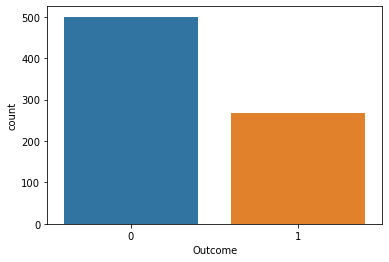

In [90]:
sns.countplot(pima_df["Outcome"])

Observation:
- It shows imbalanced target variable 

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

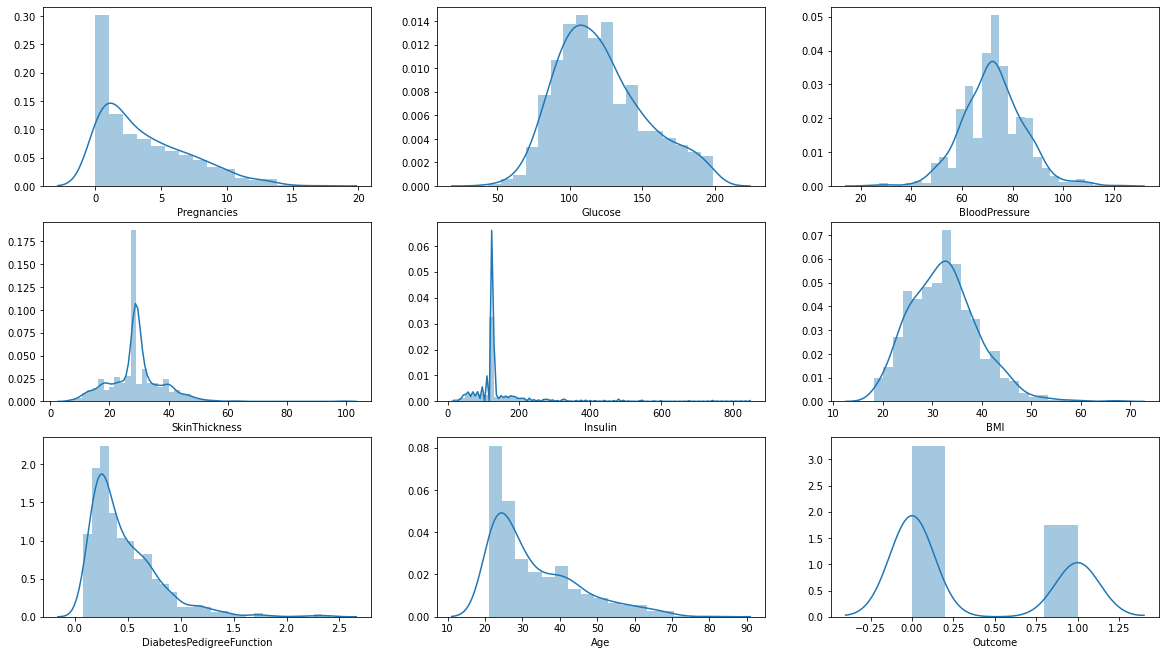

In [91]:
plt.figure(figsize=(20,35))
for i,col in enumerate(pima_df.columns):
    plt.subplot(9,3,i+1)
    sns.distplot(pima_df[col])

Observation:
- Pregnancies, DiabetesPedigreeFuncation, Insulin, skinThickness and Age are having outlier
- BloodPressure is distributed uniformly. 

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

<Figure size 1440x2520 with 0 Axes>

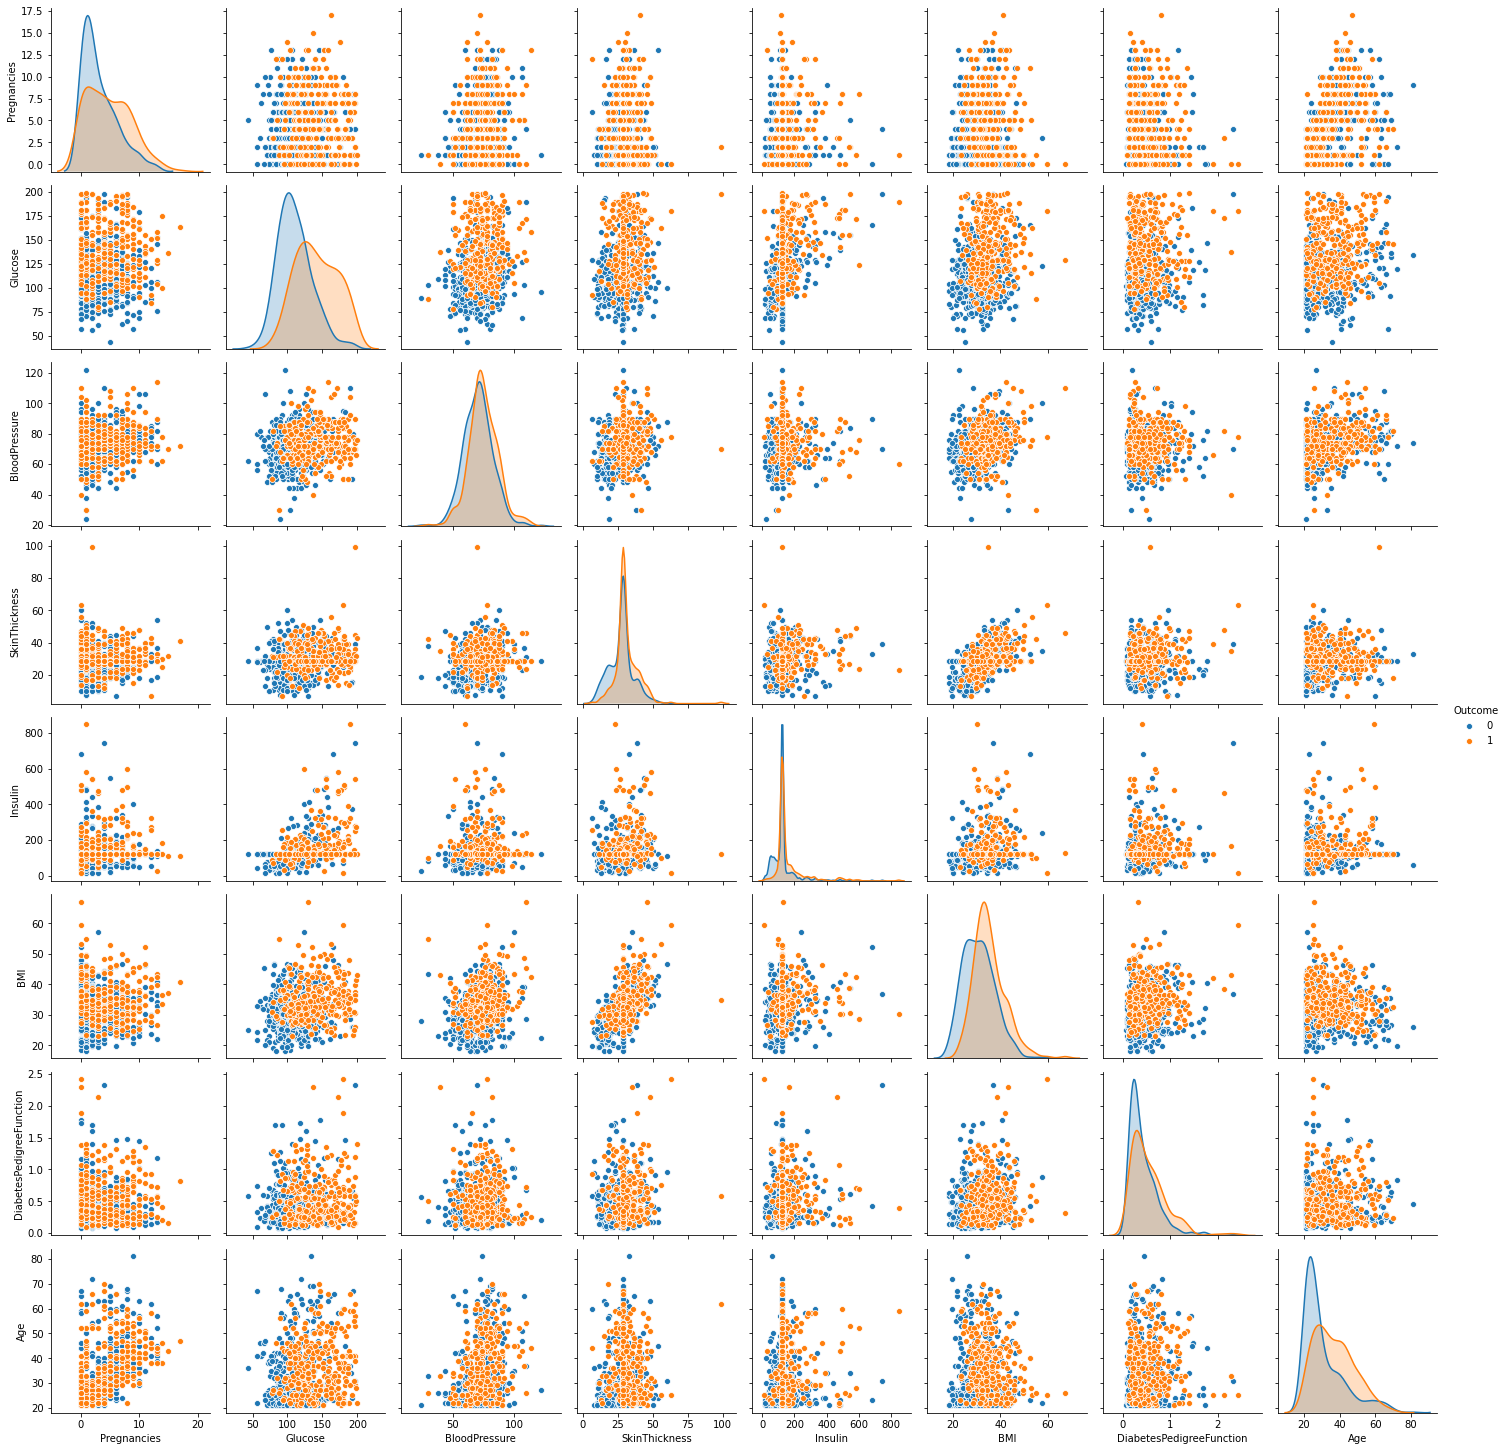

In [96]:
sns.pairplot(pima_df, hue='Outcome')

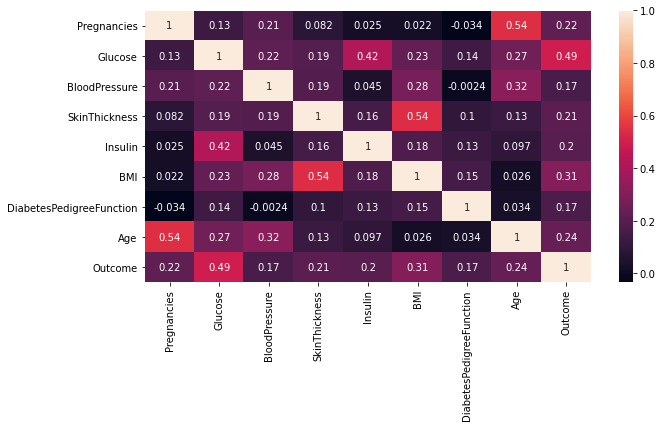

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(pima_df.corr(), annot=True)

 Observation:
- Pregnancies and Age are highly corelated 
- Glucose and outcome are highly corelated. Glucose is good attribute as there is significant impact on Outcome.   
- BMI and SkinThickness are highly corelated
- There is moderate corelation between Glucose and Insulin

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [104]:
# Spliting independent variables and depended variable

X=pima_df.drop('Outcome',axis=1) #Independent variables
y=pima_df['Outcome'] #Dependent variable

# Spliting 70% traning set and 30% test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [294]:
# Initializing Decision Tree classifier and learning

dtmodel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [295]:
# Predict the outcome for testing set
y_predict = dtmodel.predict(X_test)

# Accuracy score
print("Training accuracy:", dtmodel.score(X_train , y_train))
print("Testing accuracy:", dtmodel.score(X_test , y_test))

Training accuracy: 0.8324022346368715
Testing accuracy: 0.8138528138528138


In [114]:
print(confusion_matrix(y_test, y_predict))

[[126  20]
 [ 25  60]]


Observation:
- Model has predicted correctly for 186 patients.
- Model prediction is incorrect for 45 patients. 

# Q11 Print the feature importance of the decision model

In [115]:
dtmodel.feature_importances_


array([0.        , 0.36850058, 0.04223324, 0.04760441, 0.10500173,
       0.24569249, 0.06516227, 0.12580528])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [188]:
#Initialize the RandomForest Classifier and Learning
rfcl=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1, max_depth=5)
rfcl.fit(X_train, y_train)

# Predict the Outcome for test set
y_rfpredict = rfcl.predict(X_test)

In [190]:
print("Training accuracy:",rfcl.score(X_train , y_train))
print("Testing accuracy:", rfcl.score(X_test , y_test))
print(confusion_matrix(y_test, y_rfpredict))

Training accuracy: 0.8324022346368715
Testing accuracy: 0.7835497835497836
[[131  15]
 [ 35  50]]


Observation:
- Model has predicted correctly for 181 patients.
- Model prediction is incorrect for 50 patients. 
    

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [296]:
#Initializing AdaBooster and learning
RF_boost=AdaBoostClassifier(n_estimators=40, random_state=1)

RF_boost.fit(X_train, y_train)
# Predict the outcome for test set
y_adpredict =  RF_boost.predict(X_test)

In [297]:
print("Training accuracy:",RF_boost.score(X_train , y_train))
print("Testing accuracy:", RF_boost.score(X_test , y_test))
print(confusion_matrix(y_test, y_rfpredict))

Training accuracy: 0.8063314711359404
Testing accuracy: 0.7878787878787878
[[131  15]
 [ 35  50]]


Observation:

- Model has predicted correctly for 181 patients.
- Model prediction is incorrect for 50 patients. 

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [223]:
#Initializing RandomForest Classifier and using this as base estimator for bagging
rf=RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=1, max_depth=5)
bag=BaggingClassifier(base_estimator = rf, n_estimators=40,random_state=1)

# Learn the model
bag.fit(X_train, y_train)
# Predict the Outcome for test set
y_bgpredict =  bag.predict(X_test)

In [224]:
print("Training accuracy:",bag.score(X_train , y_train))
print("Testing accuracy:", bag.score(X_test , y_test))
print(confusion_matrix(y_test, y_bgpredict))

Training accuracy: 0.8268156424581006
Testing accuracy: 0.7878787878787878
[[132  14]
 [ 35  50]]


Observation:

- Model has predicted correctly for 182 patients.
- Model prediction is incorrect for 49 patients. 

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [299]:
#Initializing GradientBooster Classifier and learn the model
GB_boost=GradientBoostingClassifier(n_estimators=95, random_state=1, learning_rate=0.01)
GB_boost.fit(X_train, y_train)

# Predict the Outcome for test set
y_gbpredict =  GB_boost.predict(X_test)

In [300]:
print("Training accuracy:",GB_boost.score(X_train , y_train))
print("Testing accuracy:", GB_boost.score(X_test , y_test))
print(confusion_matrix(y_test, y_gbpredict))

Training accuracy: 0.7783985102420856
Testing accuracy: 0.7575757575757576
[[137   9]
 [ 47  38]]


Observation:

- Model has predicted correctly for 175 patients.
- Model prediction is incorrect for 56 patients

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [301]:
#Initializing Voting classifer and apply above models Decision Tree, RandomForest, Bagging, Gradient Booster 
stacked = VotingClassifier(estimators = [('Bagged_LR',bag),('BoostedRF', RF_boost), ('DT',dtmodel), ('GBoost', GB_boost)],voting='soft')
stacked.fit(X_train, y_train)

#Predict the Outcome for test set 
y_votepredict =  stacked.predict(X_test)

In [302]:
print("Training accuracy:",stacked.score(X_train , y_train))
print("Testing accuracy:", stacked.score(X_test , y_test))
print(confusion_matrix(y_test, y_votepredict))

Training accuracy: 0.839851024208566
Testing accuracy: 0.7922077922077922
[[129  17]
 [ 31  54]]


Observation:

- Model has predicted correctly for 183 patients.
- Model prediction is incorrect for 48 patients